# Strategic game of risk

In the strategic board game called Risk, one player can attack up to three soldiers simultaneously, while the defending player can defend up to two. In the case of exactly three attackers and two defenders, the collision is as follows. An attacking player rolls three red dice while the defending player rolls two blue dice. Then they compare the bigest throws of the attacker and the defender. The lesser value loses a soldier, in the case of equal values the attacker loses one soldier. Then the second largest numbers are also compared in the same way. Thus, the battle has three outcomes: 1) the attacker loses two soldiers, 2) each side loses 1-1 soldiers, 3) the defender loses two soldiers.

![title](Risk.jpg)

## Determining the relative frequency of the three events using Monte Carlo simuations

We repeat the abopve experiment 100000 times and find the probability of each outcome as follows

In [39]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
def roll_red():
    return [1 + int(6*rnd.random()) for _ in range(3)]

def roll_blue():
    return [1 + int(6*rnd.random()) for _ in range(2)]

In [41]:
def outcome(attckr, dfndr):
    
    assert len(attckr) == 3
    assert len(dfndr) == 2
    
    attckr.sort()
    dfndr.sort()
    
    case1, case2 = 0, 0
    
    if (attckr[2] > dfndr[1]):
        case1 += 1
    else:
        case2 += 1
    
    if (attckr[1] > dfndr[0]):
        case1 += 1
    else:
        case2 += 1
    
    if (case1 == 2):
        outcome = [0, 0, 1]
    elif (case1 == 1):
        outcome = [0, 1, 0]
    else:
        outcome = [1, 0, 0]
      
    return outcome

In [42]:
otcm_lst = []
num_sim = 100000
for i in range(num_sim):
    attckr = roll_red()
    dfndr = roll_blue()
    otcm_lst.append(outcome(attckr, dfndr))

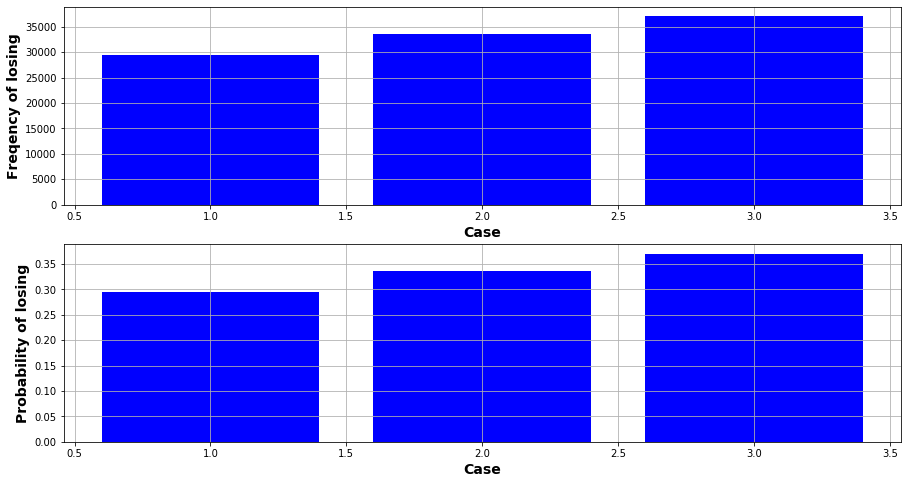

In [43]:
rltv_frqncy = np.asarray(otcm_lst).sum(axis = 0)
rltv_prblty = rltv_frqncy/num_sim

fig = plt.figure(figsize = [15, 8])

ax1 = fig.add_subplot(2,1,1)
ax1.bar([1, 2, 3], rltv_frqncy, color = 'b')
ax1.set_xlabel('Case', fontSize = 14, fontweight = 'bold')
ax1.set_ylabel('Freqency of losing',  fontSize = 14, fontweight = 'bold')
ax1.grid(True)

ax1 = fig.add_subplot(2,1,2)
ax1.bar([1, 2, 3], rltv_prblty, color = 'b')
ax1.set_xlabel('Case', fontSize = 14, fontweight = 'bold')
ax1.set_ylabel('Probability of losing',  fontSize = 14, fontweight = 'bold')
ax1.grid(True)

## Determining the exact probability using basic probability definition

To determine the exact probability of losing, we go by the basic definition of probability i.e. the probability of occuring of an event $A$ in a sample space $S$ is
$$ p(A) = \frac{n(A)}{n(S)}$$
where $n(A)$ and $n(S)$ is the number of cases in favour of $A$ and total number of cases respectively. 

In this problem, the two players, attacker and defender, throw the dice simultaneously i.e. we have 5 dice. The total number of possible numbers on 5 dice are $6^5 = 7776$.

Now we need to find the number of cases in favour of given three outcomes. 

In [50]:
def roll(dice):
    red = sorted(dice[0 : 3])
    blue = sorted(dice[3 : ])
    
    attack, defend = 0, 0
    
    if red[2] > blue[1]:
        attack += 1
    else:
        defend += 1
        
    if red[1] > blue[0]:
        attack += 1
    else:
        defend += 1
    
    return [attack, defend]
        

In [51]:
import itertools 

attacker_count, defender_count, draw_count = 0, 0, 0

for dice in itertools.product([1, 2, 3, 4, 5, 6], repeat = 5):
    die_throw = roll(dice)
    if die_throw[0] == 2:
        attacker_count += 1
    elif die_throw[1] == 2:
        defender_count += 1
    else:
        draw_count += 1

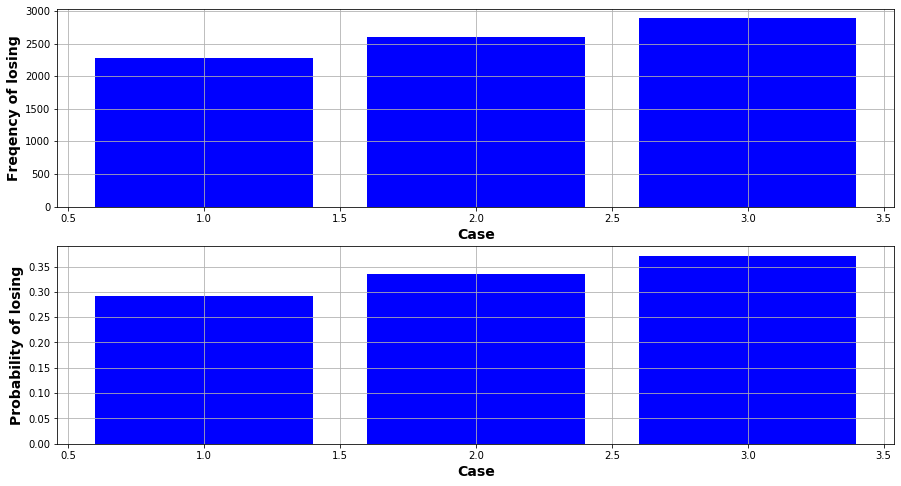

In [58]:
# defender_count comes first in the array below because winning of defender is loss 
# of attacker 
theoretical_freq = [defender_count, draw_count, attacker_count] 

theoretical_prob = [defender_count/(6**5), draw_count/(6**5), attacker_count/(6**5)]

fig = plt.figure(figsize = [15, 8])

ax1 = fig.add_subplot(2,1,1)
ax1.bar([1, 2, 3], theoretical_freq, color = 'b')
ax1.set_xlabel('Case', fontSize = 14, fontweight = 'bold')
ax1.set_ylabel('Freqency of losing',  fontSize = 14, fontweight = 'bold')
ax1.grid(True)

ax1 = fig.add_subplot(2,1,2)
ax1.bar([1, 2, 3], theoretical_prob, color = 'b')
ax1.set_xlabel('Case', fontSize = 14, fontweight = 'bold')
ax1.set_ylabel('Probability of losing',  fontSize = 14, fontweight = 'bold')
ax1.grid(True)

In [59]:
theoretical_prob

[0.2925668724279835, 0.3357767489711934, 0.37165637860082307]

We can see that the simulated probabilities converges to the theoretical probabilities. 